In [ ]:
# https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

In [ ]:
#https://www.mathworks.com/help/deeplearning/ug/visualize-image-classifications-using-maximal-and-minimal-activating-images.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
#Step 2:- Loading the data

labels = ['healthy', 'unhealthy']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
''' import os
os.chdir("/content/drive/My Drive")
!ls  '''

' import os\nos.chdir("/content/drive/My Drive")\n!ls  '


Load all images into fooddata folder as prescribed format

1.   Divide fooddata into train and val ,
2.   train again into healthy , unhealthy ,test again into  healthy , unhealthy



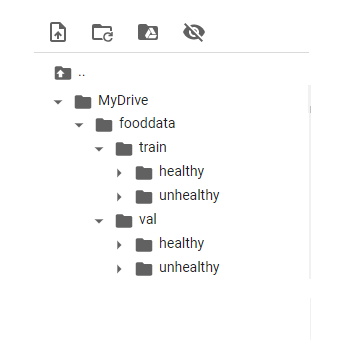
  


In [ ]:
train = get_data('/content/drive/My Drive/fooddata/train')
val = get_data('/content/drive/My Drive/fooddata/val')

<ipython-input-4-5cc4bc33e12d>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:

#Step 3:- Visualize the data

#sns.countplot(train)

Text(0.5, 1.0, 'healthy')

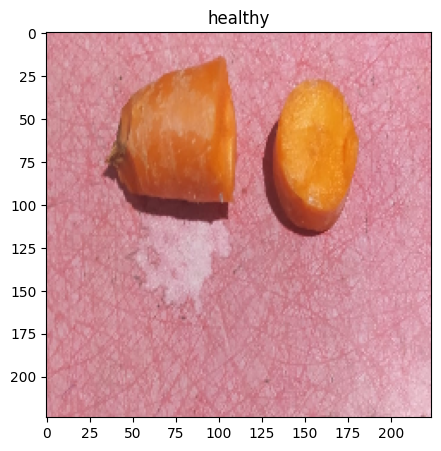

In [ ]:
#Let us also visualize a random image from the pen and pencil classes:-
plt.figure(figsize = (5,5))
plt.imshow(train[8][0])
plt.title(labels[train[8][1]])

Text(0.5, 1.0, 'unhealthy')

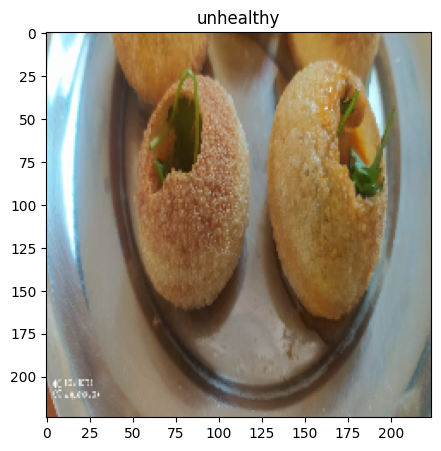

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
''' TRAIN_DIR='cosmetic'
datagen = ImageDataGenerator(validation_split=0.3, )
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    subset='validation'
) '''

" TRAIN_DIR='cosmetic'\ndatagen = ImageDataGenerator(validation_split=0.3, )\ntrain_generator = datagen.flow_from_directory(\n    TRAIN_DIR,\n    subset='training'\n)\n\nval_generator = datagen.flow_from_directory(\n    TRAIN_DIR,\n    subset='validation'\n) "

In [ ]:
#Step 4:- Data Preprocessing and Data Augmentation
x_train = []
y_train = []
x_val = []
y_val = []


In [ ]:
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
print(y_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
x_train.shape

(889, 224, 224, 3)

In [ ]:
y_train.shape


(889,)

In [ ]:
#Data augmentation on the train data:-
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
x_train.shape

(889, 224, 224, 3)

In [ ]:
y_train.shape

(889,)

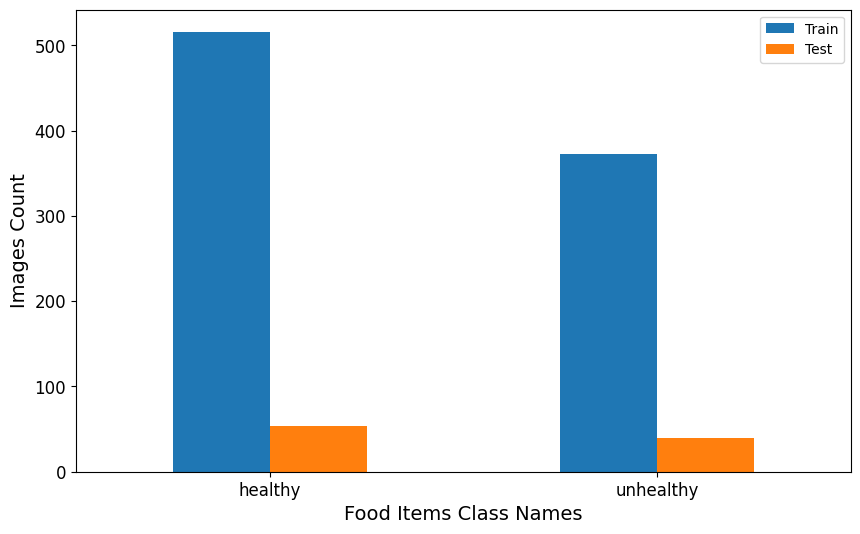

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class_names = labels
_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_val, return_counts=True)

# Create a DataFrame and plot the bar chart
df = pd.DataFrame({'Train': train_counts, 'Test': test_counts}, index=class_names)

# Plot the bar chart
ax = df.plot(kind='bar', rot=0, figsize=(10, 6))

# Set the axis labels and increase font size
ax.set_xlabel('Food Items Class Names', fontsize=14)
ax.set_ylabel('Images Count', fontsize=14)

# Increase the font size of the tick labels on the x and y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


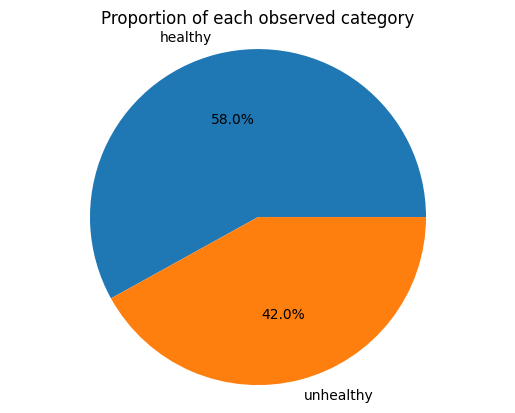

In [ ]:
plt.pie(train_counts,
        explode=(0, 0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

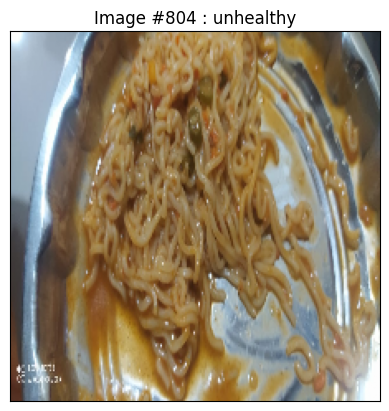

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()
display_random_image(class_names, x_train, y_train)

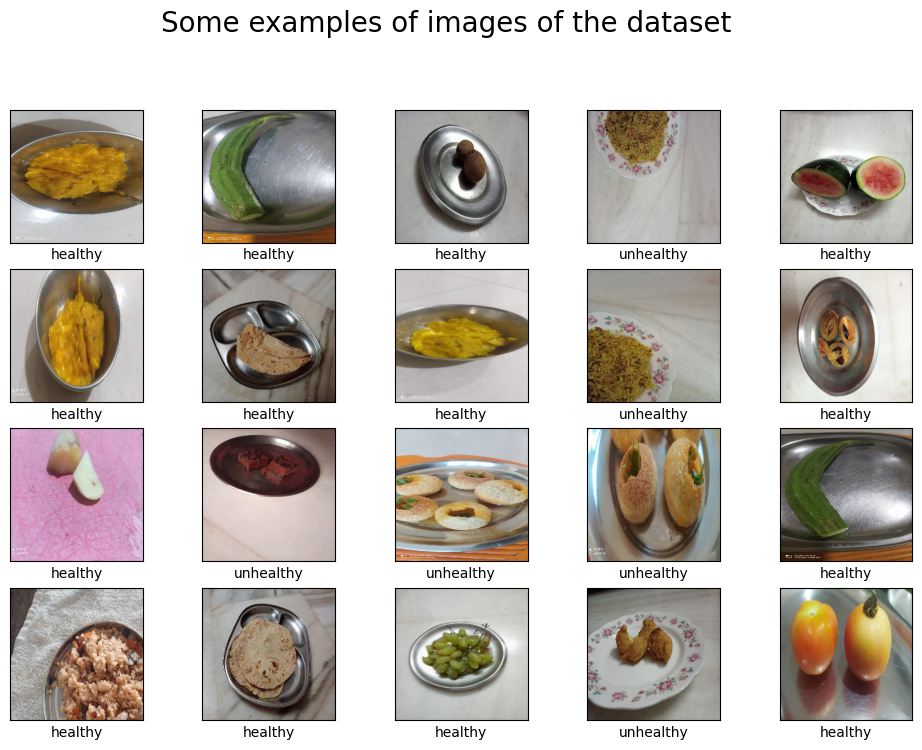

In [ ]:
'''
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(12,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=20)
    for i in range(15):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_examples(class_names, x_train, y_train)

'''
def displayn_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(12,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=20)
    for i in range(20):
      index = np.random.randint(images.shape[0])
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[index], cmap=plt.cm.binary)
      plt.xlabel(class_names[labels[index]])
    plt.show()
displayn_examples(class_names, x_train, y_train)

In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

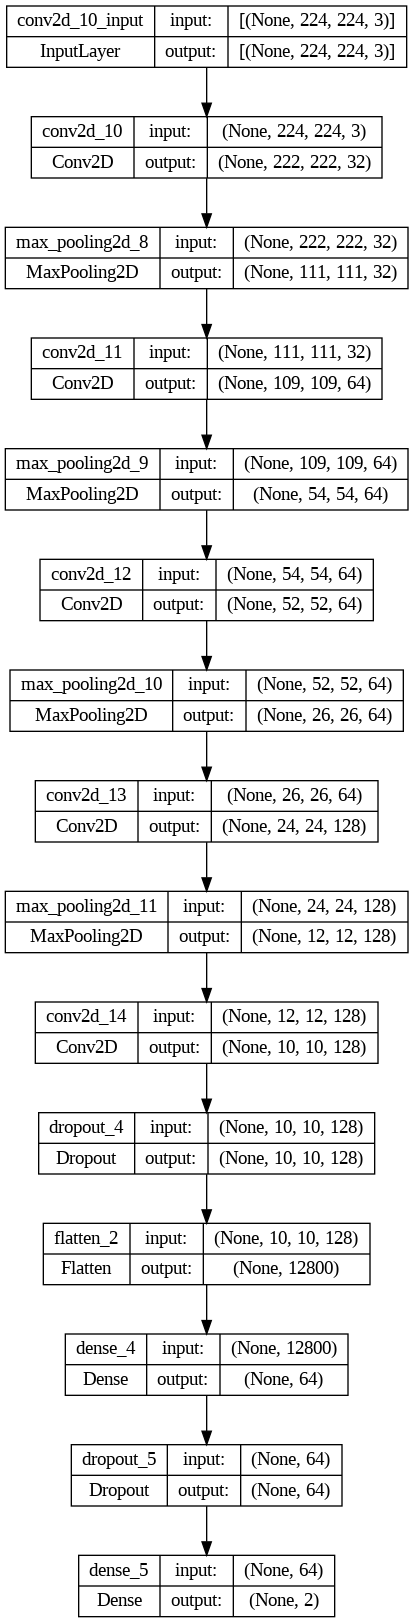

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
import time
batch_size = 128
start_time = time.time()
history = model.fit(x_train, y_train, epochs=50,batch_size=batch_size,
                    validation_data=(x_val, y_val))

end_time = time.time()  # Record the end time
training_duration = end_time - start_time  # Calculate the duration in seconds

print(f"Training duration: {training_duration:.2f} seconds")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 6s 410ms/step - loss: 0.7057 - accuracy: 0.5051 - val_loss: 0.6805 - val_accuracy: 0.5745
Epoch 2/50
7/7 [==============================] - 2s 306ms/step - loss: 0.6799 - accuracy: 0.5804 - val_loss: 0.6791 - val_accuracy: 0.5745
Epoch 3/50
7/7 [==============================] - 2s 319ms/step - loss: 0.6769 - accuracy: 0.5804 - val_loss: 0.6712 - val_accuracy: 0.5745
Epoch 4/50
7/7 [==============================] - 2s 308ms/step - loss: 0.6612 - accuracy: 0.5804 - val_loss: 0.6327 - val_accuracy: 0.5745
Epoch 5/50
7/7 [==============================] - 2s 322ms/step - loss: 0.6228 - accuracy: 0.5804 - val_loss: 0.5580 - val_accuracy: 0.5745
Epoch 6/50
7/7 [==============================] - 2s 334ms/step - loss: 0.5589 - accuracy: 0.6513 - val_loss: 0.5211 - val_accuracy: 0.6915
Epoch 7/50
7/7 [==============================] - 2s 316ms/step - loss: 0.5450 - accuracy: 0.6963 - val_loss: 0.5475 - val_accuracy: 0.6809
Epoch 8/50
7/7 [===============

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Split your data into training and validation sets
# Extract features from the CNN model
X_train_features = model.predict(x_train)
X_test_features = model.predict(x_val)

# Reshape the feature vectors for the SVM
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)

# Standardize the feature data
#scaler = StandardScaler()
X_train = X_train_features
X_valid = X_test_features

# Create an SVM classifier
svm = SVC()
# Define hyperparameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Display results for different hyperparameters
results = grid_search.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"Hyperparameters: {params}, Mean Accuracy: {mean_score:.2%}")

# Train the SVM with the best hyperparameters on the entire training set
best_svm = SVC(C=best_params['C'], kernel=best_params['kernel'])
best_svm.fit(X_train, y_train)

# Evaluate the SVM on the validation set
accuracy = best_svm.score(X_valid, y_val)
print("\nBest Hyperparameters:", best_params)
print("Validation Accuracy with Best Hyperparameters:", accuracy)
print("Best Mean Accuracy from Grid Search:", best_accuracy)

3/3 [==============================] - 0s 222ms/step
Hyperparameters: {'C': 0.1, 'kernel': 'linear'}, Mean Accuracy: 100.00%
Hyperparameters: {'C': 0.1, 'kernel': 'rbf'}, Mean Accuracy: 100.00%
Hyperparameters: {'C': 0.1, 'kernel': 'poly'}, Mean Accuracy: 99.89%
Hyperparameters: {'C': 1, 'kernel': 'linear'}, Mean Accuracy: 100.00%
Hyperparameters: {'C': 1, 'kernel': 'rbf'}, Mean Accuracy: 100.00%
Hyperparameters: {'C': 1, 'kernel': 'poly'}, Mean Accuracy: 99.89%
Hyperparameters: {'C': 10, 'kernel': 'linear'}, Mean Accuracy: 100.00%
Hyperparameters: {'C': 10, 'kernel': 'rbf'}, Mean Accuracy: 100.00%
Hyperparameters: {'C': 10, 'kernel': 'poly'}, Mean Accuracy: 99.89%

Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}
Validation Accuracy with Best Hyperparameters: 0.9680851063829787
Best Mean Accuracy from Grid Search: 1.0


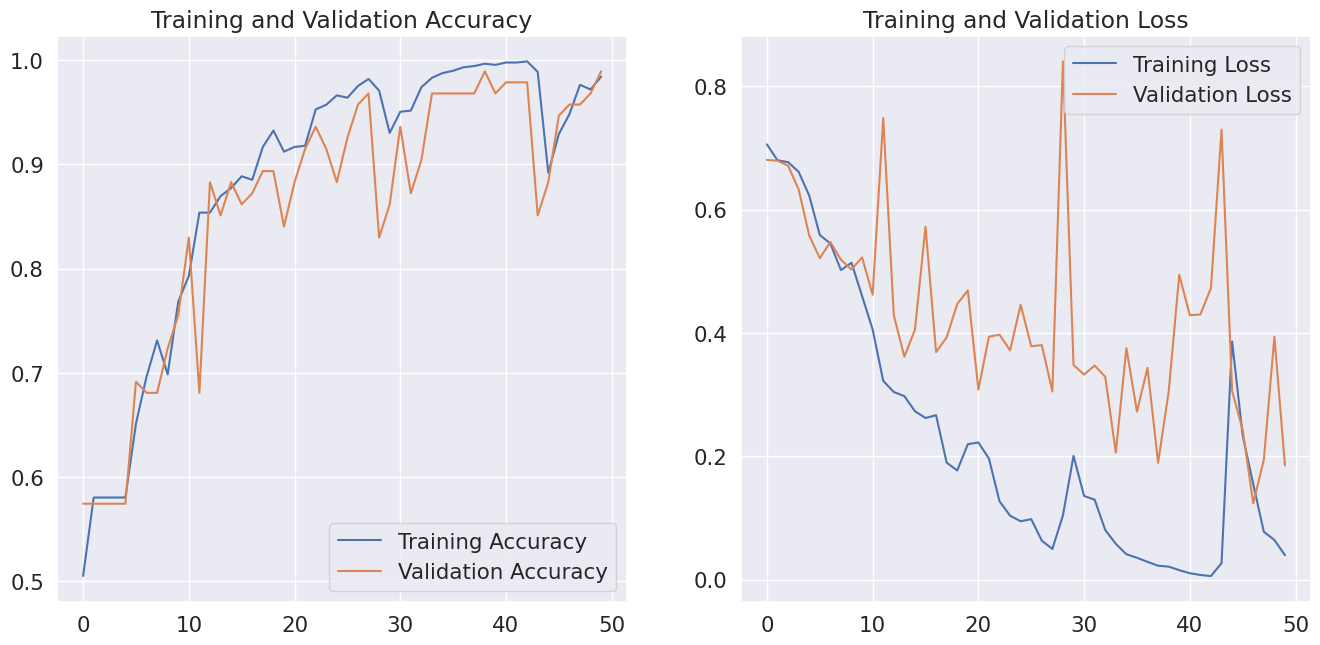

In [ ]:
#Step 6:- Evaluating the result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(3, 3, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Testing
start_time = time.time()  # Record the start time for testing

test_loss, test_accuracy = model.evaluate(x_val, y_val)

end_time = time.time()  # Record the end time for testing
testing_duration = end_time - start_time  # Calculate the testing duration in seconds

print(f"Training duration: {training_duration:.2f} seconds")
print(f"Testing duration: {testing_duration:.2f} seconds")
#This code records the start time before training, the end time after training, and calculates the training duration. Then, it records the start time before testing, the end time after testing, and calculates the testing duration. The training and testing times are then printed to the console.







3/3 [==============================] - 0s 23ms/step - loss: 0.1852 - accuracy: 0.9894
Training duration: 144.73 seconds
Testing duration: 0.36 seconds


In [ ]:
from sklearn.metrics import accuracy_score

prediction = model.predict(x_val)
pred_label = np.argmax(prediction, axis = 1)
pred_label

3/3 [==============================] - 0s 18ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

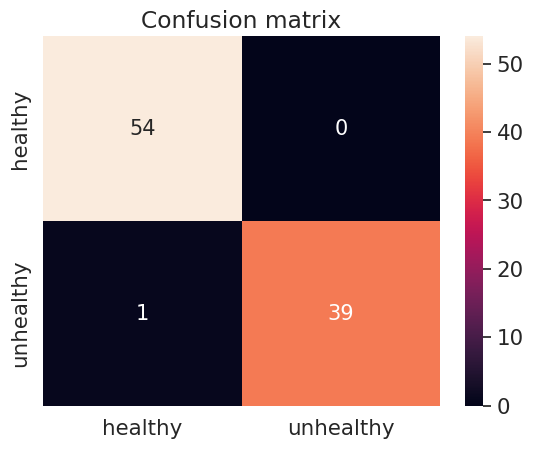

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
CM = confusion_matrix(y_val, pred_label)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 15},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

3/3 [==============================] - 0s 17ms/step


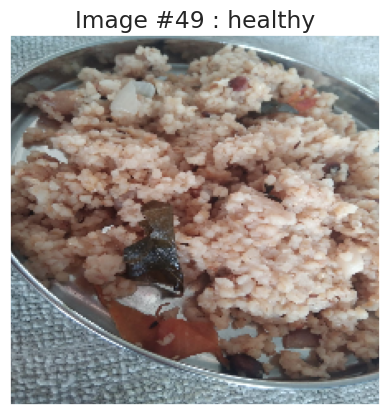

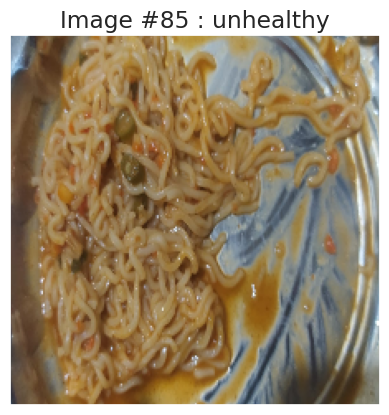

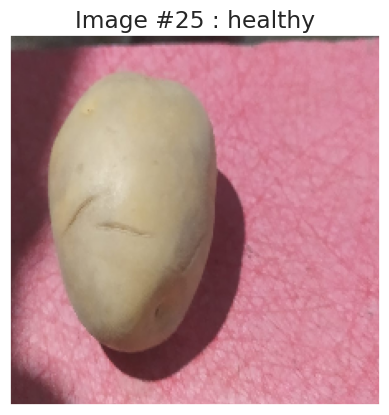

In [ ]:
# Prediction of the data
predictions = model.predict(x_val)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

for i in range(3):
    display_random_image(class_names, x_val, pred_labels)


In [ ]:
from sklearn.metrics import classification_report


# Calculate the classification report, which includes the F1-score
classification_report_result = classification_report(y_val, pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", classification_report_result)




Classification Report:
               precision    recall  f1-score   support

     healthy       0.98      1.00      0.99        54
   unhealthy       1.00      0.97      0.99        40

    accuracy                           0.99        94
   macro avg       0.99      0.99      0.99        94
weighted avg       0.99      0.99      0.99        94



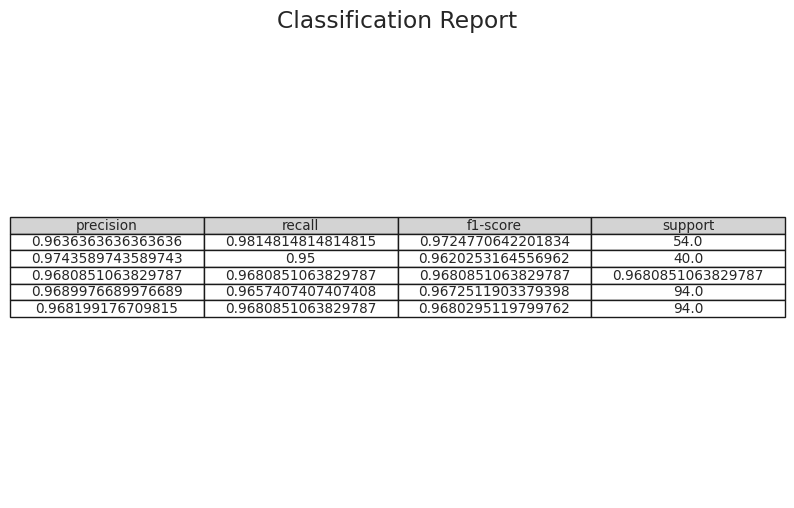

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Calculate the classification report, which includes the F1-score
classification_report_result = classification_report(y_val, pred_labels, target_names=class_names, output_dict=True)

# Convert the classification report to a DataFrame for easier plotting
import pandas as pd
report_df = pd.DataFrame(classification_report_result).transpose()

# Create a plot from the DataFrame
fig, ax = plt.subplots(figsize=(10, 6))  # Increased figsize for better clarity
ax.axis('tight')
ax.axis('off')
ax.table(cellText=report_df.values, colLabels=report_df.columns, cellLoc='center', loc='center', colColours=['lightgray']*len(report_df.columns))
plt.title("Classification Report")

# Save the plot as an image (e.g., PNG) with higher DPI for better quality
plt.savefig('classification_report.png', format='png', dpi=300, bbox_inches='tight')  # Increased DPI for better quality


In [ ]:
import graphviz

# Create a new Graph
dot = graphviz.Digraph('Image_Classification_Flowchart', format='png')

# Define the nodes and edges
steps = [
    'Start',
    'Data Acquisition',
    'Data Preprocessing',
    'Image Enhancement',
    'Feature Extraction (CNN)',
    'Classification (SVM)',
    'Evaluation & Fine-Tuning',
    'Model Deployment',
    'End',
]

for i in range(len(steps) - 1):
    dot.node(steps[i], shape='box')
    dot.edge(steps[i], steps[i + 1])

# Save the flowchart to a file
dot.render('image_classification_flowchart2', view=True)


In [ ]:
from graphviz import Digraph

# Create a new Digraph
dot = Digraph(format='png', engine='dot')

# Define the steps
steps = [
    'Start',
    'Data Acquisition',
    'Data Preprocessing',
    'Image Enhancement',
    'Feature Extraction (CNN)',
    'Load Data',
    'Resize',
    'Normalization',
    'Use Pre-trained CNN Model',
    'Split Data',
    'Encode Labels',
    'Apply Enhancements',
    'Extract Features',
    'Flatten/Reshape',
    'Feature Vectors',
    'Train SVM Classifier',
    'Hyperparameter Tuning',
    'Best Hyperparameters',
    'Train SVM with Best Hyperparameters',
    'Evaluation & Fine-Tuning',
    'Classification (SVM)',
    'Model Deployment',
    'End'
]

# Add nodes
for step in steps:
    dot.node(step, shape='box')

# Add edges
for i in range(len(steps) - 1):
    dot.edge(steps[i], steps[i + 1])

# Render the flowchart
dot.render('image_classification_flowchart9', view=True)


In [ ]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph('Flowchart', format='png')

# Define the steps and their descriptions
steps = [
    ("Data Collection and Preparation", "Gather a dataset of images that you want to categorize."),
    ("Data Collection and Preparation", "Annotate or label the images with their corresponding categories."),
    ("Data Collection and Preparation", "Split the dataset into training, validation, and test sets."),
    ("Data Preprocessing", "Resize images to a consistent size."),
    ("Data Preprocessing", "Normalize pixel values to ensure they have a common scale."),
    ("Data Preprocessing", "Augment the data with techniques like rotation, flipping, or cropping."),
    ("Feature Extraction", "Choose a method for feature extraction."),
    ("Feature Extraction", "In deep learning, you can use Convolutional Neural Networks (CNNs)."),
    ("Feature Extraction", "Extract features from intermediate layers if needed."),
    ("Feature Representation", "Convert the extracted features into a suitable representation for classification."),
    ("Feature Representation", "For deep learning, this often involves flattening feature maps or using global average pooling."),
    ("Model Selection", "Choose a classification model."),
    ("Model Selection", "Common choices include Support Vector Machines (SVM), Random Forests, and deep learning models (CNNs)."),
    ("Model Selection", "Fine-tune the model selection based on the nature of the data and the problem you are solving."),
    ("Training the Model", "Train the selected model on the training data."),
    ("Training the Model", "Monitor the training process and use techniques like early stopping to prevent overfitting."),
    ("Hyperparameter Tuning", "Optimize model hyperparameters to achieve better classification performance."),
    ("Hyperparameter Tuning", "This may involve grid search, random search, or Bayesian optimization."),
    ("Validation and Cross-Validation", "Evaluate the model on the validation dataset to assess its performance."),
    ("Validation and Cross-Validation", "Perform cross-validation for more robust model evaluation."),
    ("Model Evaluation", "Evaluate the model on the test dataset to assess its generalization performance."),
    ("Model Evaluation", "Use metrics such as accuracy, precision, recall, F1-score, and confusion matrices for evaluation."),
    ("Post-Processing and Visualization", "Visualize the results to gain insights into model behavior."),
    ("Post-Processing and Visualization", "Apply post-processing techniques if necessary, such as smoothing predictions or eliminating noise."),
    ("Model Deployment", "Deploy the trained model for real-world use."),
    ("Model Deployment", "This may involve integrating it into applications, websites, or other systems."),
    ("End", ""),
]

# Add nodes and edges
for step, description in steps:
    dot.node(step, label=description, shape="box")

# Connect the nodes
for i in range(len(steps) - 1):
    dot.edge(steps[i][0], steps[i + 1][0])

# Render the flowchart
dot.render('flowchart', view=True)


In [ ]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph('Flowchart', format='png')
dot.engine = 'neato'  # Use the 'neato' layout engine

# Adjust node separation to reduce overlap
dot.graph_attr['nodesep'] = '1.0'  # Adjust the separation between nodes
dot.graph_attr['ranksep'] = '1.0'  # Adjust the separation between ranks (i.e., rows of nodes)

# Define the steps and their descriptions
steps = [
    ("1", "Gather a dataset of images that you want to categorize."),
    ("2", "Annotate or label the images with their corresponding categories."),
    ("3", "Split the dataset into training, validation, and test sets."),
    ("4", "Resize images to a consistent size."),
    ("5", "Normalize pixel values to ensure they have a common scale."),
    ("6", "Augment the data with techniques like rotation, flipping, or cropping."),

    ("8", "Convolutional Neural Networks (CNNs)."),
    ("9", "Extract features from intermediate layers if needed."),
    ("10", "Convert the extracted features into a suitable representation for classification."),
    ("11", "For deep learning, this often involves flattening feature maps or using global average pooling."),
    ("12", "Choose a classification model."),
    ("13", "Common choices include Support Vector Machines (SVM), Random Forests, and deep learning models (CNNs)."),
    ("14", "Fine-tune the model selection based on the nature of the data and the problem you are solving."),
    ("15", "Train the selected model on the training data."),
    ("16", "Monitor the training process and use techniques like early stopping to prevent overfitting."),
    ("17", "Optimize model hyperparameters to achieve better classification performance."),
    ("18", "This may involve grid search, random search, or Bayesian optimization."),
    ("19", "Evaluate the model on the validation dataset to assess its performance."),
    ("20", "Perform cross-validation for more robust model evaluation."),
    ("21", "Evaluate the model on the test dataset to assess its generalization performance."),
    ("22", "Use metrics such as accuracy, precision, recall, F1-score, and confusion matrices for evaluation."),
    ("23", "Visualize the results to gain insights into model behavior."),
    ("24", "Apply post-processing techniques if necessary, such as smoothing predictions or eliminating noise."),
    ("25", "Deploy the trained model for real-world use."),
    ("26", "This may involve integrating it into applications, websites, or other systems."),
    ("End", ""),
]

# Add nodes and edges
for step, description in steps:
    dot.node(step, label=description, shape="box",width="5.0", height="1.0")
'''
# Connect the nodes
for i in range(len(steps) - 1):
    dot.edge(steps[i][0], steps[i + 1][0])
'''
# Render the flowchart
dot.render('flowchart827', view=True)


In [ ]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph('Flowchart', format='png')

# Define the steps and their descriptions
steps = [("0","Input"),
    ("1","Data Collection and Preparation - Gather images, Annotate or label images,Split the dataset into training, validation, and test sets."),
    ("2", "Data Preprocessing - Resize images, Normalize,Augment the data with techniques like rotation, flipping, or cropping."),
    ("3","Feature Extraction - Convolutional Neural Networks (CNNs)."),
    ("4","Feature Representation - feature maps."),
    ("5","Model Selection - classification model such as Support Vector Machines (SVM),deep learning models (CNNs)."),
    ("6", "Fine-tune the model selection "),
    ("7","Training the Model - Train the selected model on the training data."),
    ("8","Hyperparameter Tuning - Optimize model hyperparameters, grid search"),
    ("9","Validation and Cross-Validation - Evaluate the model on the validation dataset,Perform cross-validation ."),
    ("10","Model Evaluation - Use metrics such as accuracy, precision, recall, F1-score, and confusion matrices ."),
    ("11","Model Deployment - Deploy the trained model for real-world use."),
    ("End", "Output"),
]

# Add nodes and edges
for step, description in steps:
    dot.node(step, label=description, shape="box")

# Connect the nodes
for i in range(len(steps) - 1):
    dot.edge(steps[i][0], steps[i + 1][0])

# Render the flowchart
dot.render('flowchart123', view=True)


TypeError: ignored